In [2]:
pip install nltk

Processing c:\users\tog\appdata\local\pip\cache\wheels\45\6c\46\a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266\nltk-3.5-py3-none-any.whlNote: you may need to restart the kernel to use updated packages.

  Using cached regex-2020.6.8-cp37-cp37m-win_amd64.whl (268 kB)


In [16]:
import nltk
import pandas as pd
import string
import re

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TOG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
train = pd.read_csv('Train.csv')

# Data Cleaning and Preprocessing

In [15]:
train.isnull().sum()

ID       0
text     0
label    0
dtype: int64

In [17]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
#remove punctuation
def remove_punct(text):
   text_nopunct =  "".join([char for char in text if char not in string.punctuation])
   return text_nopunct

train['text_clean'] = train['text'].apply(lambda x: remove_punct(x))

In [19]:
train.head()

,ID,text,label,text_clean
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,I feel that it was better I dieAm happy
1,9JDAGUV3,Why do I get hallucinations?,Drugs,Why do I get hallucinations
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,I am stresseed due to lack of financial suppor...
3,6UY7DX6Q,Why is life important?,Suicide,Why is life important
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,How could I be helped to go through the depres...


In [25]:
#tokenize text
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

train['text_tokenized'] = train['text_clean'].apply(lambda x: tokenize(x.lower()))

In [26]:
train.head()

,ID,text,label,text_clean,text_tokenized
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,I feel that it was better I dieAm happy,"[i, feel, that, it, was, better, i, dieam, happy]"
1,9JDAGUV3,Why do I get hallucinations?,Drugs,Why do I get hallucinations,"[why, do, i, get, hallucinations]"
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,I am stresseed due to lack of financial suppor...,"[i, am, stresseed, due, to, lack, of, financia..."
3,6UY7DX6Q,Why is life important?,Suicide,Why is life important,"[why, is, life, important]"
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,How could I be helped to go through the depres...,"[how, could, i, be, helped, to, go, through, t..."


In [27]:
stopword = nltk.corpus.stopwords.words('english')

In [36]:
#remove_stopwords
def remove_stopwords(body):
    text = [word for word in body if word not in stopword]
    return text

train['text_nostop'] = train['text_tokenized'].apply(lambda x: remove_stopwords(x))

In [37]:
train.head()

,ID,text,label,text_clean,text_tokenized,text_nostop
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,I feel that it was better I dieAm happy,"[i, feel, that, it, was, better, i, dieam, happy]","[feel, better, dieam, happy]"
1,9JDAGUV3,Why do I get hallucinations?,Drugs,Why do I get hallucinations,"[why, do, i, get, hallucinations]","[get, hallucinations]"
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,I am stresseed due to lack of financial suppor...,"[i, am, stresseed, due, to, lack, of, financia...","[stresseed, due, lack, financial, support, sch..."
3,6UY7DX6Q,Why is life important?,Suicide,Why is life important,"[why, is, life, important]","[life, important]"
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,How could I be helped to go through the depres...,"[how, could, i, be, helped, to, go, through, t...","[could, helped, go, depression]"


In [35]:
ps = nltk.PorterStemmer()

In [38]:
#try stemmatization
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

train['text_stemmed'] = train['text_nostop'].apply(lambda x: stemming(x))

train.head()

,ID,text,label,text_clean,text_tokenized,text_nostop,text_stemmed
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,I feel that it was better I dieAm happy,"[i, feel, that, it, was, better, i, dieam, happy]","[feel, better, dieam, happy]","[feel, better, dieam, happi]"
1,9JDAGUV3,Why do I get hallucinations?,Drugs,Why do I get hallucinations,"[why, do, i, get, hallucinations]","[get, hallucinations]","[get, hallucin]"
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,I am stresseed due to lack of financial suppor...,"[i, am, stresseed, due, to, lack, of, financia...","[stresseed, due, lack, financial, support, sch...","[stresse, due, lack, financi, support, school]"
3,6UY7DX6Q,Why is life important?,Suicide,Why is life important,"[why, is, life, important]","[life, important]","[life, import]"
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,How could I be helped to go through the depres...,"[how, could, i, be, helped, to, go, through, t...","[could, helped, go, depression]","[could, help, go, depress]"


In [39]:
wn = nltk.WordNetLemmatizer()

In [43]:
#try lemmatization
def lemmatize(body):
    text = " ".join([wn.lemmatize(word) for word in body])
    return text

train['text_lemmatize'] = train['text_nostop'].apply(lambda x: lemmatize(x))

train.head()

,ID,text,label,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemmatize
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,I feel that it was better I dieAm happy,"[i, feel, that, it, was, better, i, dieam, happy]","[feel, better, dieam, happy]","[feel, better, dieam, happi]",feel better dieam happy
1,9JDAGUV3,Why do I get hallucinations?,Drugs,Why do I get hallucinations,"[why, do, i, get, hallucinations]","[get, hallucinations]","[get, hallucin]",get hallucination
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,I am stresseed due to lack of financial suppor...,"[i, am, stresseed, due, to, lack, of, financia...","[stresseed, due, lack, financial, support, sch...","[stresse, due, lack, financi, support, school]",stresseed due lack financial support school
3,6UY7DX6Q,Why is life important?,Suicide,Why is life important,"[why, is, life, important]","[life, important]","[life, import]",life important
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,How could I be helped to go through the depres...,"[how, could, i, be, helped, to, go, through, t...","[could, helped, go, depression]","[could, help, go, depress]",could helped go depression


# Vectorizing

# # Count Vectorization

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
count_vect = CountVectorizer()
x_counts = count_vect.fit_transform(train['text_lemmatize'])

x_counts_df = pd.DataFrame(x_counts.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,713,714,715,716,717,718,719,720,721,722
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# # Count Vectorization with ngram_range

In [51]:
count_vect_ngram = CountVectorizer(ngram_range=(1,2))
x_counts_ngram = count_vect_ngram.fit_transform(train['text_lemmatize'])

x_counts_df_ngram = pd.DataFrame(x_counts_ngram.toarray())
x_counts_df_ngram

,0,1,2,3,4,5,6,7,8,9,...,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# # Term Frequency - Identity Document Frequency(TF_IDF)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer()

x_tfidf = tf_idf_vect.fit_transform(train['text_lemmatize'])

x_tfidf_df = pd.DataFrame(x_tfidf.toarray())
x_tfidf_df.columns = tf_idf_vect.get_feature_names()
x_tfidf_df

,abandoned,able,abuse,academic,accept,add,addict,addicted,addiction,addidcted,...,world,worldm,worried,worst,worth,would,wronged,yet,young,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Enginering
## Length of texts feature

In [57]:
data = pd.read_csv('Train.csv')

data['text_len'] = data['text'].apply(lambda x: len(x) - x.count(" ")) 

data.head(10)

,ID,text,label,text_len
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,31
1,9JDAGUV3,Why do I get hallucinations?,Drugs,24
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,47
3,6UY7DX6Q,Why is life important?,Suicide,19
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,42
5,V6VSDJ5I,What are the effects of depression to ones health,Depression,41
6,9736J4UE,Why is everything so hard to deal with in this...,Depression,41
7,AY8L479Y,I feel emotionally overwhelmed,Depression,27
8,OSFJV5EC,How to manage taking alcohol?,Alcohol,25
9,U4SGUGGM,Is heaven open for us who smoke bhang?,Drugs,31


# # % of punctuation in text

In [59]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)* 100

data['text_punct%'] = data['text'].apply(lambda x: count_punct(x))

data.head()

,ID,text,label,text_len,punct%,text_punct%
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,31,0.0,0.0
1,9JDAGUV3,Why do I get hallucinations?,Drugs,24,4.2,4.2
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,47,0.0,0.0
3,6UY7DX6Q,Why is life important?,Suicide,19,5.3,5.3
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,42,2.4,2.4


In [60]:
data.drop(columns="punct%")

,ID,text,label,text_len,text_punct%
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,31,0.0
1,9JDAGUV3,Why do I get hallucinations?,Drugs,24,4.2
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,47,0.0
3,6UY7DX6Q,Why is life important?,Suicide,19,5.3
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,42,2.4
...,...,...,...,...,...
611,BOHSNXCN,What should I do to stop alcoholism?,Alcohol,30,3.3
612,GVDXRQPY,How to become my oldself again,Suicide,25,0.0
613,IO4JHIQS,How can someone stop it?,Alcohol,20,5.0
614,1DS3P1XO,I feel unworthy,Depression,13,0.0


# # Evaluate Created Features

In [62]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

C:\Users\TOG\anaconda3\envs\bert-tensorflow\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\TOG\anaconda3\envs\bert-tensorflow\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\Users\TOG\anaconda3\envs\bert-tensorflow\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\TOG\anaconda3\envs\bert-tensorflow\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'densit

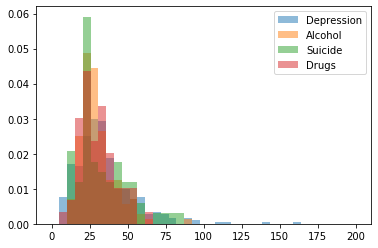

In [66]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='Depression']['text_len'], bins, alpha=0.5, normed=True, label="Depression")
pyplot.hist(data[data['label']=='Alcohol']['text_len'], bins, alpha=0.5, normed=True, label="Alcohol")
pyplot.hist(data[data['label']=='Suicide']['text_len'], bins, alpha=0.5, normed=True, label="Suicide")
pyplot.hist(data[data['label']=='Drugs']['text_len'], bins, alpha=0.5, normed=True, label="Drugs")
pyplot.legend(loc='upper right')
pyplot.show()

C:\Users\TOG\anaconda3\envs\bert-tensorflow\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\TOG\anaconda3\envs\bert-tensorflow\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\Users\TOG\anaconda3\envs\bert-tensorflow\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\TOG\anaconda3\envs\bert-tensorflow\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'densit

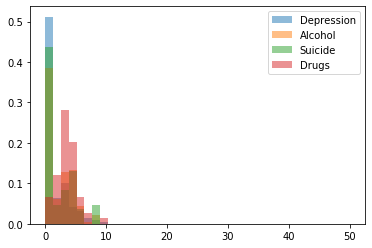

In [67]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']=='Depression']['text_punct%'], bins, alpha=0.5, normed=True, label="Depression")
pyplot.hist(data[data['label']=='Alcohol']['text_punct%'], bins, alpha=0.5, normed=True, label="Alcohol")
pyplot.hist(data[data['label']=='Suicide']['text_punct%'], bins, alpha=0.5, normed=True, label="Suicide")
pyplot.hist(data[data['label']=='Drugs']['text_punct%'], bins, alpha=0.5, normed=True, label="Drugs")
pyplot.legend(loc='upper right')
pyplot.show()

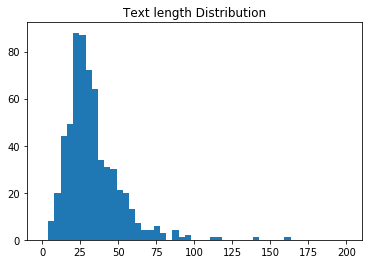

In [69]:
#FULL HISTOGRAM TEXT LENGTH
bins = np.linspace(0, 200, 50)
pyplot.hist(data['text_len'], bins)
pyplot.title("Text length Distribution")
pyplot.show()

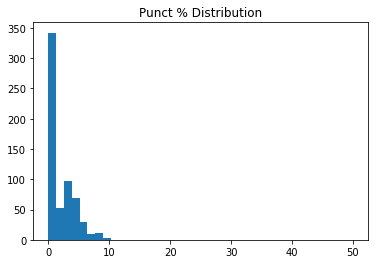

In [71]:
#FULL HISTOGRAM PUNCTATION 
bins = np.linspace(0, 50, 40)
pyplot.hist(data['text_punct%'], bins)
pyplot.title("Punct % Distribution")
pyplot.show()

# # Feature Transformation

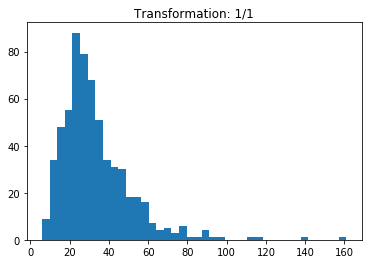

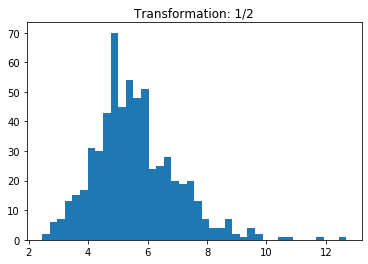

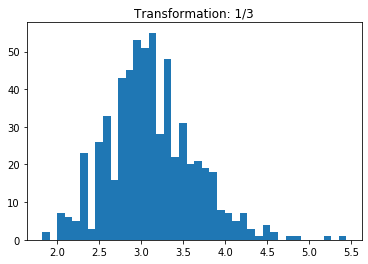

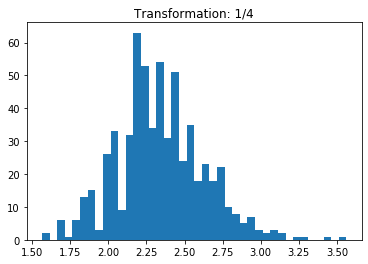

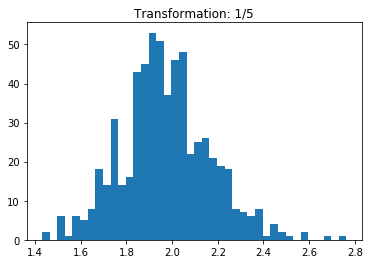

In [73]:
#Box-Cox Power Transformation for text length
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['text_len'])**(1/i), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

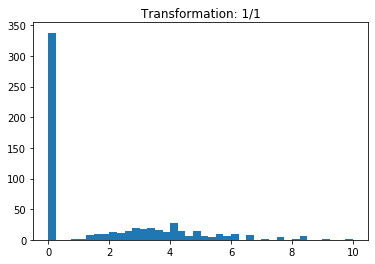

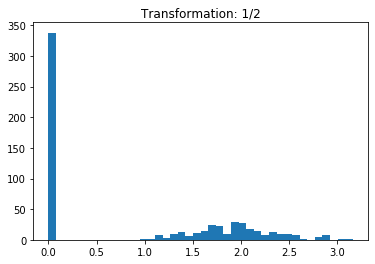

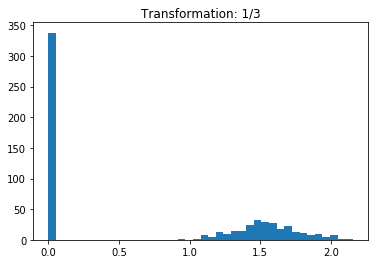

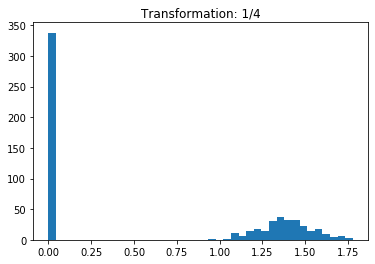

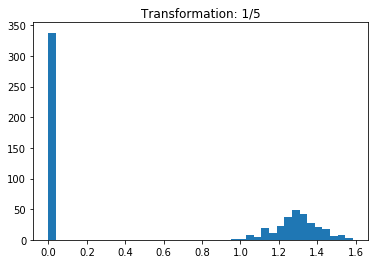

In [74]:
#Box-Cox Power Transformation for text punct%
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['text_punct%'])**(1/i), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

# Machine Learning Classifiers: Random Forest Model